In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import qutip
import math

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
rabi = 1
h = 1 #6063e-34
detuning = 0.5
J = 1

#define interaction Hamiltonian
H_int = qutip.Qobj([[0, 0, 0, 0], [0, 0,  J/2.0, 0], [0, J/2.0, 0, 0], [0, 0, 0, 0]], dims=[[2,2],[2,2]])
print(H_int)


In [131]:
initial = qutip.tensor(qutip.basis(2, 0), qutip.basis(2, 1))#inital state is spin up - spin down system
print(initial)

times = np.linspace(0, 10, 100) #times which the evolution will return the state vector

#define sigma z operators for each atom
z1 = qutip.tensor(qutip.sigmaz(), qutip.qeye(2))
z2 = qutip.tensor(qutip.qeye(2), qutip.sigmaz())
print(z1)
evolution = qutip.mesolve(H_int, initial, times, [], [z1, z2])


Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]


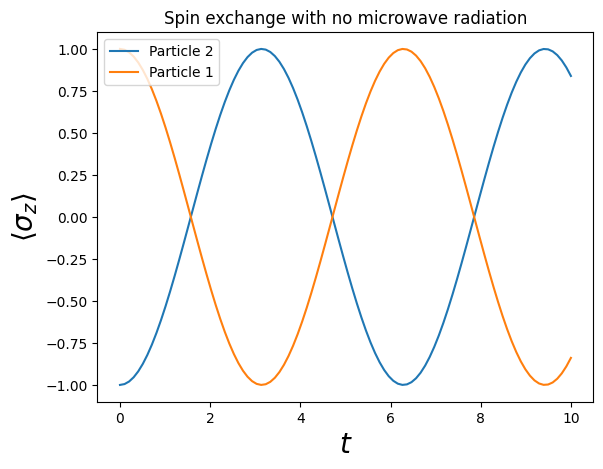

In [133]:
#plot results
fig, axes = plt.subplots(1, 1)

axes.plot(times, evolution.expect[1], label="Particle 2")
axes.plot(times, evolution.expect[0], label="Particle 1")

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20)
axes.legend(loc=2)
axes.set(title='Spin exchange with no microwave radiation')
plt.show()

In [135]:
#2 particles with microwave radiation terms (no detuning)

args = {'tau': math.pi/(2*rabi), 'hold': 10} #pulse duration and hold time (pi/2 pulse)
times1 = np.linspace(0, 20, 1000) #times which the evolution will return the state vector

def pulse(t, args):
    if t < args['tau']:
        return rabi
    elif t < args['tau'] + args['hold']:
        return 0 
    elif t < 2 * args['tau'] + args['hold']:
        return rabi
    else:
        return 0

H_driv = qutip.Qobj([[0, h*rabi*0.5], [h*rabi*0.5, 0]])

H_mol1 = qutip.tensor(H_driv, qutip.qeye(2))
H_mol2 = qutip.tensor(qutip.qeye(2), H_driv)

H = [[H_mol1, pulse], [H_mol2, pulse], H_int]

print(H)


[[Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]
 [0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]], <function pulse at 0x0000020D5BAEDD00>], [Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.5 0.  0. ]
 [0.5 0.  0.  0. ]
 [0.  0.  0.  0.5]
 [0.  0.  0.5 0. ]], <function pulse at 0x0000020D5BAEDD00>], Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.  0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.  0. ]]]


In [137]:
initial1 = qutip.tensor(qutip.basis(2, 0), qutip.basis(2, 1))#inital state is spin down - down system

evolution1 = qutip.mesolve(H, initial1, times1, [], [z1, z2], args=args, options=qutip.Options(max_step=1e-4,nsteps=10000))


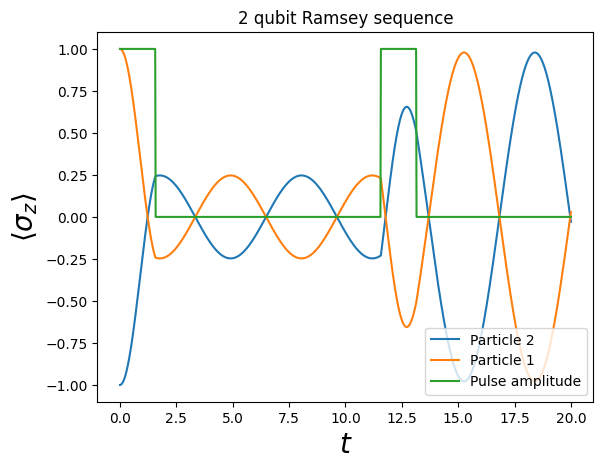

In [138]:
#plot results
fig, axes = plt.subplots(1, 1)


axes.plot(times1, evolution1.expect[1], label="Particle 2")
axes.plot(times1, evolution1.expect[0], label="Particle 1")

axes.set_xlabel(r"$t$", fontsize=20)

#pulse graph
value = []
for i in times1:
    s = pulse(i, args)
    value = value + [s]

axes.plot(times1, value, label='Pulse amplitude')
axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20)

axes.set(title='2 qubit Ramsey sequence')

axes.legend(loc=4)
plt.show()

In [139]:
evolution1 = qutip.mesolve(H, initial1, times1, [], [], args=args, options=qutip.Options(max_step=1e-4,nsteps=10000))
evolution1.states[-1]

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[-0.01476042-0.10189631j]
 [-0.16536967-0.6901001j ]
 [ 0.67370186-0.14607899j]
 [-0.01476042-0.10189631j]]

[[Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]
 [0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]], <function pulse at 0x0000020D5BAEDD00>], [Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.5 0.  0. ]
 [0.5 0.  0.  0. ]
 [0.  0.  0.  0.5]
 [0.  0.  0.5 0. ]], <function pulse at 0x0000020D5BAEDD00>], Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.  0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.  0. ]], Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.  -0.5 -0. ]
 [ 0.   0.  -0.  -0.5]], Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.  -0.5  0.  -0. ]
 [ 0.   0.   0.   0. ]
 [ 

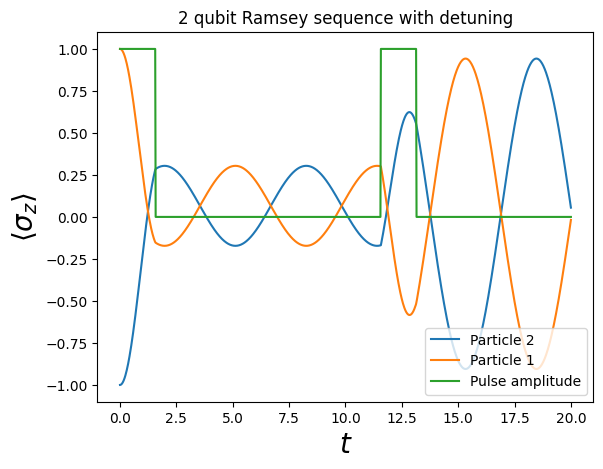

In [151]:
#add detuning 
H_det = qutip.Qobj([[0, 0], [0, -h*detuning]])

H_det1 = qutip.tensor(H_det, qutip.qeye(2))
H_det2 = qutip.tensor(qutip.qeye(2), H_det)

H2 = [[H_mol1, pulse], [H_mol2, pulse], H_int, H_det1, H_det2]
print(H2)

#time evolution
evolution4 = qutip.mesolve(H2, initial1, times1, [], [z1, z2], args=args, options=qutip.Options(max_step=1e-4,nsteps=10000))

#plot results
fig, axes = plt.subplots(1, 1)


axes.plot(times1, evolution4.expect[1], label="Particle 2")
axes.plot(times1, evolution4.expect[0], label="Particle 1")

axes.set_xlabel(r"$t$", fontsize=20)

#pulse graph
value = []
for i in times1:
    s = pulse(i, args)
    value = value + [s]

axes.plot(times1, value, label='Pulse amplitude')
axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20)

axes.legend(loc=4)
axes.set(title='2 qubit Ramsey sequence with detuning')
plt.show()